In [1]:
import pandas as pd
import numpy as np

In [2]:
data_filename = "Daily Update Data Agregat Covid-19 Jakarta.xlsx"

In [3]:
dataset = []

In [4]:
for i in range (0,10): 
    sheet = pd.read_excel(data_filename,sheet_name=i)
    dataset.append(sheet)

# Dataset variable information 
- **DJ** = Data Jakarta
- **DIJ** = Data Indonesia and Jakarta
- **Suspek** = Data Suspek
- **RDT ab** = Data  RDT ab
- **RDT ag** = Data RDT ag
- **HL** = Data Hasil Lab
- **V** = Data vaksinasi
- **P** = Data pemakaman
- **VW** = Data vaksinasi wilayah
- **DVWI** = Daily vaksinasi wilayah

In [5]:
df_DJ = dataset[0]
df_DIJ = dataset[1]
df_Suspek = dataset[2]
df_RDTab = dataset[3]
df_RDTag = dataset[4]
df_HL = dataset[5]
df_V = dataset[6]
df_P = dataset[7]
df_VW = dataset[8]
df_DVW = dataset[9]

In [6]:
idx = 0 
for i in dataset : 
    print(f"dataset ke dari excel {idx}: ")
    print(i.info())
    print()
    idx+=1

dataset ke dari excel 0: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Tanggal                             503 non-null    datetime64[ns]
 1   Jam                                 484 non-null    float64       
 2   Tanggal Jam                         503 non-null    datetime64[ns]
 3   Total Pasien                        503 non-null    int64         
 4   Sembuh                              503 non-null    int64         
 5   Meninggal                           503 non-null    int64         
 6   Self Isolation                      503 non-null    int64         
 7   Masih Perawatan                     503 non-null    int64         
 8   Belum Diketahui (masih verifikasi)  0 non-null      float64       
 9   Menunggu Hasil                      6 non-null      float64       
 10  

## Cleanup and rearange data
### Cleanup RDT ab dataset

In [7]:
df_RDTab.drop(columns=["Unnamed: 6","catatan:","No."],inplace=True)

In [8]:
df_RDTab.head()

,Tanggal,Reaktif,Non-Reaktif,Total,Positivity Rate
0,2020-03-27,124,10839,10963,0.011311
1,2020-03-28,149,11858,12007,0.012409
2,2020-03-29,206,14808,15014,0.013721
3,2020-03-30,290,17619,17909,0.016193
4,2020-03-31,307,18242,18549,0.016551


### Cleanup RDT ag dataset

In [9]:
df_RDTag.drop(columns=["No "],inplace=True)
df_RDTag.head()

,Tgl,EIS Positif,EIS Negatif,EIS Total,NAR Positivity Rate,NAR Positif,NAR Negatif,NAR Total,Excel Positivity Rate,Excel Positif,...,Excel Total,Excel Positivity Rate.1,TotalDKI Tes Harian,TotalDKI Positif Harian,TotalDKI Negatif Harian,TotalDKI Positivity Rate Harian,Total Kumulatif,Positif Kumulatif,Negatif Kumulatif,Positivity Rate Kumulatif
0,2021-01-01,76,1116,1192,0.063758,0,0,0,NaN,0,...,0,NaN,1192,76,1116,0.063758,1192,76,1116,0.063758
1,2021-01-02,76,1116,1192,0.063758,0,0,0,NaN,0,...,0,NaN,0,0,0,NaN,1192,76,1116,0.063758
2,2021-01-03,100,1699,1799,0.055586,0,0,0,NaN,0,...,0,NaN,607,24,583,0.039539,1799,100,1699,0.055586
3,2021-01-04,100,1699,1799,0.055586,0,0,0,NaN,0,...,0,NaN,0,0,0,NaN,1799,100,1699,0.055586
4,2021-01-05,100,1699,1799,0.055586,0,0,0,NaN,0,...,0,NaN,0,0,0,NaN,1799,100,1699,0.055586


### Cleaning and re-arange Vaksin dataset

In [10]:
df_V.fillna("",inplace=True)

In [11]:
df_V.columns = df_V.iloc[1] + " | " + df_V.iloc[2] + " | " + df_V.iloc[3]

In [12]:
df_V.drop([0,1,2,3],axis=0,inplace=True)

In [13]:
df_V.rename(columns={df_V.columns[0] : "Tanggal"},inplace=True)

In [14]:
df_V.head()

,Tanggal,DKI | Tenaga Kesehatan | Target Vaksinasi,DKI | Tenaga Kesehatan | Vaksinasi 1,DKI | Tenaga Kesehatan | Vaksinasi 2,DKI | Tenaga Kesehatan | Persentase 1,DKI | Tenaga Kesehatan | Persentase 2,DKI | Lansia | Target Vaksinasi,DKI | Lansia | Vaksinasi 1,DKI | Lansia | Vaksinasi 2,DKI | Lansia | Persentase 1,...,DKI | Total 12 - 17 Tahun Indonesia | Vaksinasi 2,DKI | Total 12 - 17 Tahun Indonesia | Persentase 1,DKI | Total 12 - 17 Tahun Indonesia | Persentase 2,DKI | Proposi Vaksin Jakarta D1 |,DKI | Proposi Vaksin Jakarta D2 |,Vaksin Gotong Royong | Jakarta | Vaksinasi 1,Vaksin Gotong Royong | Jakarta | Vaksinasi 2,Vaksin Gotong Royong | Indonesia | Vaksinasi 1,Vaksin Gotong Royong | Indonesia | Vaksinasi 2,Sasaran Total Indonesia: 181.554.465 | Sasaran Total DKI Jakarta: 8.815.157 |
4,2021-03-05 00:00:00,112301,141425,91078,1.25934,0.811017,911631,76451,0,0.0838618,...,,,,,,0,0,0,0,
5,2021-03-06 00:00:00,112301,144046,91379,1.28268,0.813697,911631,79421,0,0.0871197,...,,,,,,0,0,0,0,
6,2021-03-07 00:00:00,112301,177126,91460,1.57724,0.814418,911631,83628,0,0.0917345,...,,,,,,0,0,0,0,
7,2021-03-08 00:00:00,112301,181237,92988,1.61385,0.828025,911631,95140,1,0.104362,...,,,,,,0,0,0,0,
8,2021-03-09 00:00:00,112301,113326,89984,1.00913,0.801275,911631,135128,675,0.148227,...,,,,,,0,0,0,0,


# Prediction with prophet

## Prediski Kasus positif corona di indoneisa

In [15]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [16]:
m = Prophet()

In [17]:
df_DIJ.head()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,2,2,0,0,0,0,0,...,0,0,2,2,0,0,0,0,0,0
2,2020-03-03,0,0,2,2,1,0,0,2,3,...,0,0,0,0,1,0,0,2,3,2
3,2020-03-04,0,0,2,2,1,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-05,0,0,2,2,3,0,0,4,7,...,0,0,0,0,2,0,0,2,4,2


In [18]:
df = df_DIJ.rename(columns={df_DIJ.columns[0] : "ds",df_DIJ.columns[4] : "y"})

In [19]:
df.tail()

,ds,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),y,Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
498,2021-07-12,67355,2119478,380797,2567630,9462,584912,66581,16106,677061,...,891,34754,4782,40427,67,20475,-1670,-4253,14619,-5923
499,2021-07-13,68219,2139601,407709,2615529,9541,589486,71848,18368,689243,...,864,20123,26912,47899,79,4574,5267,2262,12182,7529
500,2021-07-14,69210,2157363,443473,2670046,9603,592556,78571,21180,701910,...,991,17762,35764,54517,62,3070,6723,2812,12667,9535
501,2021-07-15,70192,2176412,480199,2726803,9743,595582,86298,22978,714601,...,982,19049,36726,56757,140,3026,7727,1798,12691,9525
502,2021-07-16,71397,2204491,504915,2780803,9845,604034,88294,24843,727016,...,1205,28079,24716,54000,102,8452,1996,1865,12415,3861


In [20]:
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future = m.make_future_dataframe(periods=365)

In [22]:
future.tail()

,ds
863,2022-07-12
864,2022-07-13
865,2022-07-14
866,2022-07-15
867,2022-07-16


In [23]:
forecast = m.predict(future)

In [24]:
forecastCol = ["yhat","yhat_lower","yhat_upper"]

In [25]:
forecast[forecastCol] = forecast[forecastCol].astype(int)

In [26]:
forecast[forecastCol]

,yhat,yhat_lower,yhat_upper
0,-13744,-87714,60524
1,-12915,-94813,60214
2,-11795,-83211,61463
3,-10260,-84144,66288
4,-8264,-81300,64985
...,...,...,...
863,5227816,4192378,6308188
864,5237001,4199358,6332493
865,5246647,4228670,6355043
866,5256239,4210390,6391316


In [27]:
forecast[forecastCol].tail()

,yhat,yhat_lower,yhat_upper
863,5227816,4192378,6308188
864,5237001,4199358,6332493
865,5246647,4228670,6355043
866,5256239,4210390,6391316
867,5258421,4220476,6358810


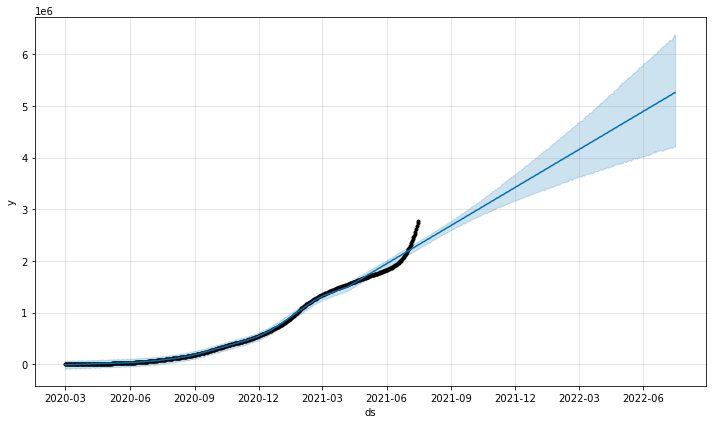

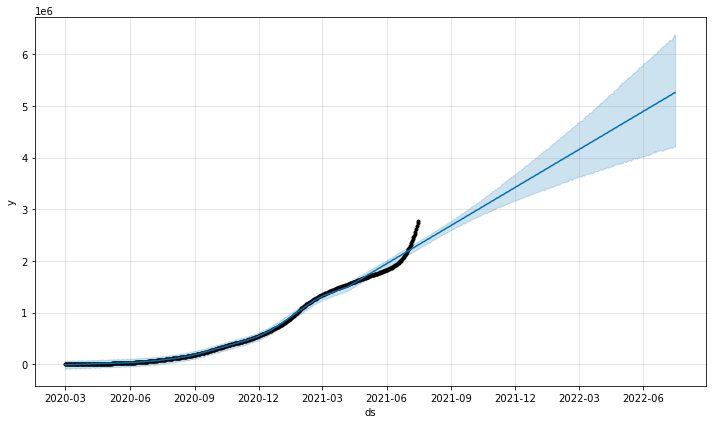

In [28]:
m.plot(forecast)

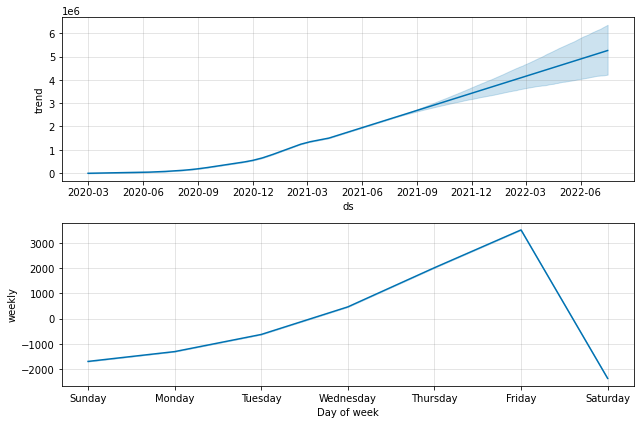

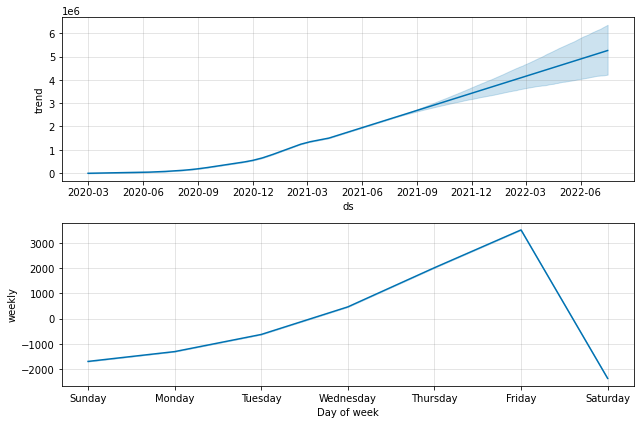

In [29]:
m.plot_components(forecast)

## Prediksi kasus kematian corona di indonesia

In [30]:
m2 = Prophet()

In [31]:
# column 1 ini kasus kematian covid di indonesia
df = df_DIJ.rename(columns={df_DIJ.columns[0] : "ds",df_DIJ.columns[1] : "y"})

In [32]:
m2.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
future = m2.make_future_dataframe(periods=365)
future.tail()

,ds
863,2022-07-12
864,2022-07-13
865,2022-07-14
866,2022-07-15
867,2022-07-16


In [34]:
forecast = m2.predict(future)

In [35]:
forecast[forecastCol] = forecast[forecastCol].astype(int)

In [36]:
forecast[forecastCol].tail()

,yhat,yhat_lower,yhat_upper
863,139848,113170,164806
864,140086,113199,164986
865,140330,113163,165552
866,140568,113138,165638
867,140656,113222,166104


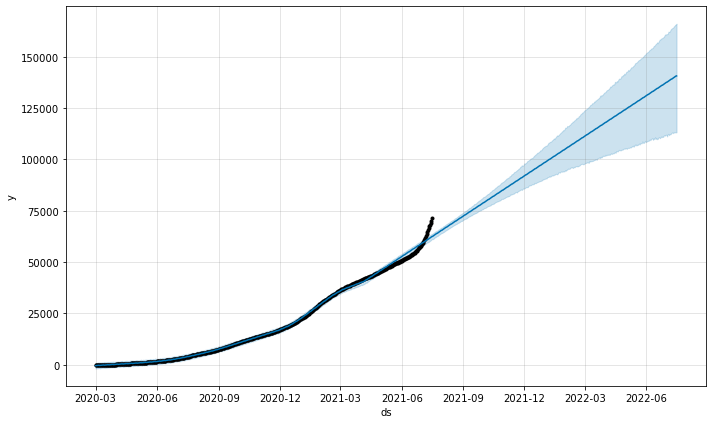

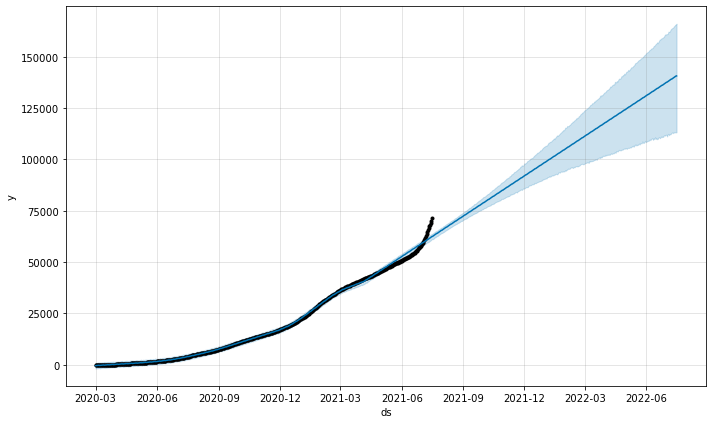

In [37]:
m2.plot(forecast)

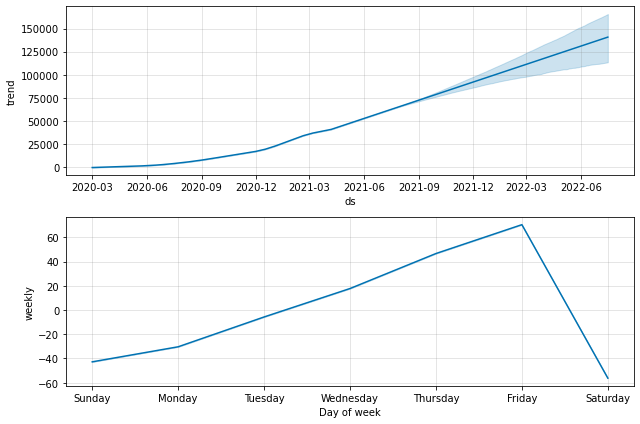

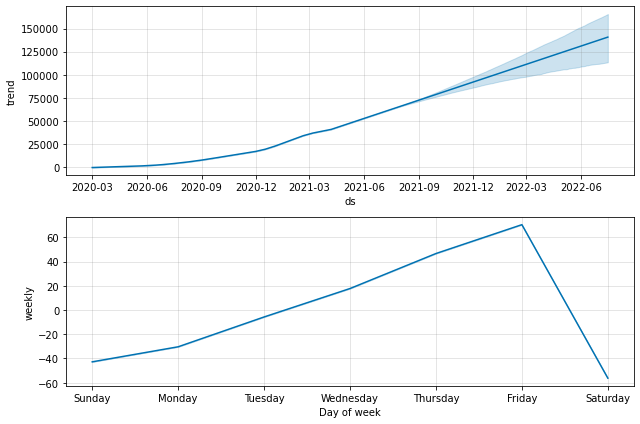

In [38]:
m2.plot_components(forecast)